`Programmed By : Rithik Tripathi`

[Connect with me on Linkedin](https://www.linkedin.com/in/rithik-tripathi-data-scientist/)

# Linear Regression

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing Data
df = pd.read_csv('Dataset/train_cleaned.csv')
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


#### Separating Target Variables

In [3]:
x = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']
df.shape, x.shape, y.shape

((8523, 46), (8523, 45), (8523,))

#### Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state = 9)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((6392, 45), (2131, 45), (6392,), (2131,))

#### Implementing Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [6]:
# creating instance of Linear Regression Class
lr = LR()

# Training the model with Gradient Descent
lr.fit(train_x, train_y)

LinearRegression()

##### predicting over Training Set

In [7]:
train_pred = lr.predict(train_x)
train_mae = mae(train_pred, train_y)
print('Training Mean Absolute Error :', train_mae)

Training Mean Absolute Error : 827.3664175128886


##### predicting over Test Set

In [8]:
test_pred = lr.predict(test_x)
test_mae = mae(test_pred, test_y)
print('Test Mean Absolute Error :', test_mae)

Test Mean Absolute Error : 861.806594100068


### Parameters of Linear Regression

In [9]:
# coefficients of the equation
lr.coef_

array([  -1.13512756, -179.79233388,   15.65668767,  -18.6574453 ,
          4.26675415,    4.2154459 ,   43.9152877 ,   20.49224006,
        -72.8897278 ,  -22.38153707,   -1.17784843,  -91.0598699 ,
        -15.79938771,  -39.47904273,  -22.75735283,    8.6798061 ,
        -52.75260518,  -20.67316491,  -20.45574445,   19.09990758,
         29.94212896,  268.66029346,  -41.52897269,  -46.52031544,
         48.20370526, -495.50373377,  -46.06491435,  158.18888447,
        -38.63257523, -468.75193706,  595.48427957,  143.00628086,
        -89.44056606,  309.29119287,  -67.57691129,  -46.06491435,
        489.27479304,  -16.45446332, -227.03765548,  211.75459927,
         15.28305621, -964.25567083,  407.4039665 ,  -38.63257523,
        595.48427957])

In [20]:
feature_importance_df = pd.DataFrame({
    'Feature' : train_x.columns,
    'Importance': lr.coef_
})

feature_importance_df['Importance_magnitude'] = feature_importance_df.Importance.abs()

feature_importance_df.sort_values(by='Importance_magnitude', inplace=True, ascending=False)
# sorting so we can plot only top n important features for better visibility

feature_importance_df.head()

,Feature,Importance,Importance_magnitude
41,Outlet_Type_Grocery Store,-964.255671,964.255671
44,Outlet_Type_Supermarket Type3,595.484280,595.484280
30,Outlet_Identifier_OUT027,595.484280,595.484280
25,Outlet_Identifier_OUT010,-495.503734,495.503734
36,Outlet_Size_Medium,489.274793,489.274793


Text(0.5, 1.0, 'Coefficient plot')

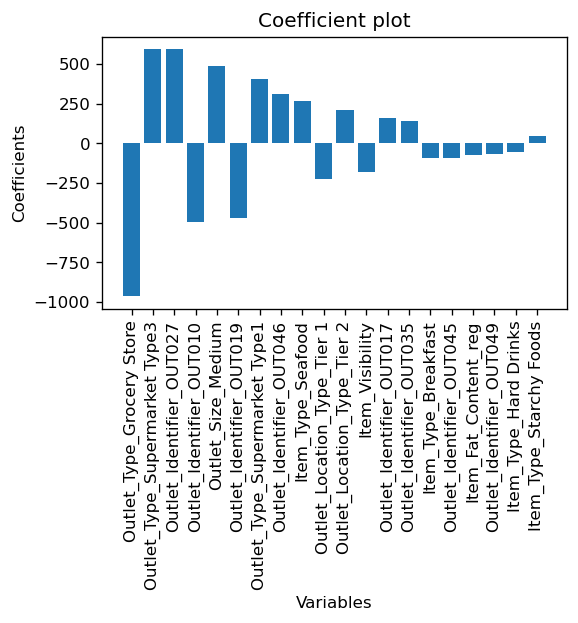

In [23]:
# plotting the coefficients


plt.figure(figsize=(5,3), dpi=120, facecolor='w', edgecolor='b')
x = feature_importance_df['Feature'].head(20)
y = feature_importance_df['Importance'].head(20)
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.xticks(rotation=90)
plt.title('Coefficient plot')

> Note : Here we can see that the model depends upon some Independent variables toos much, But these coefficients are not suitable for interpretation because these are not scaled, we will look into this later on in details.

# Validiating Assumptions of Linear Regression

In [11]:
# Calculating Error Terms

error_df = pd.DataFrame({
    'original_values' : test_y,
    'predicted_values': test_pred
})

error_df['error'] = error_df['original_values'] - error_df['predicted_values']

error_df.head()

,original_values,predicted_values,error
2344,1095.2410,3460.817769,-2365.576769
4005,5070.7328,3000.322073,2070.410727
2897,892.1720,712.864464,179.307536
6252,2976.1260,3200.235119,-224.109119
6414,365.5242,1956.201769,-1590.677569


### Homoscedasticity : Constant Vairance of Error Terms

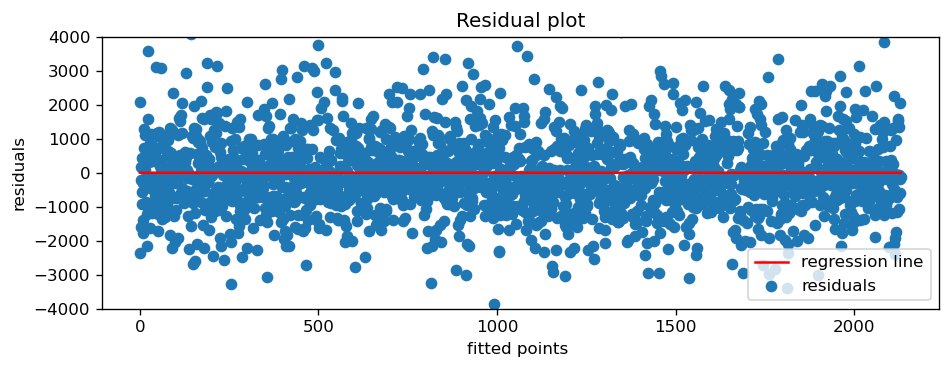

In [12]:
plt.figure(figsize=(9,3), dpi=120, facecolor='w', edgecolor='b')
f = range(0,2131)
k = [0 for i in range(0,2131)]
plt.scatter( f, error_df.error, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

> The Residual plot clearly Looks Homoscedastic, i.e. the the variance of the error across the dataset is nearly constant.

### Normally Distributed Error Terms

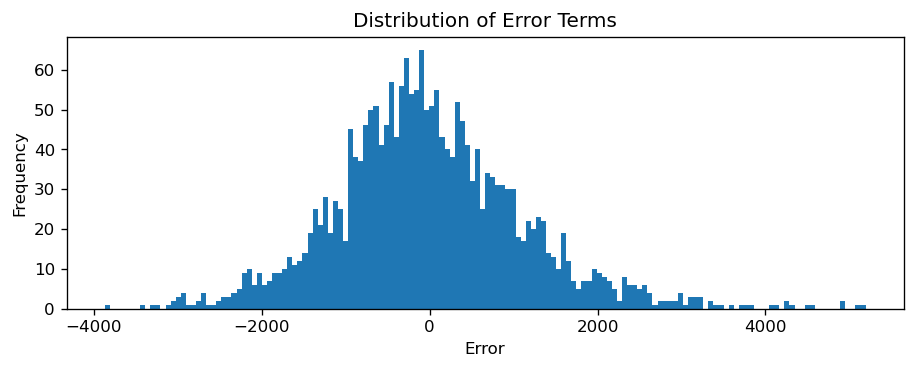

In [13]:
# Histogram for distribution of error terms
plt.figure(figsize=(9,3), dpi=120, facecolor='w', edgecolor='b')
plt.hist(error_df.error, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

> According to the Histogram, the distribution of error is nearly normal, But there are some outliers on the Higher end of the errors which could be handled easily.

##### Another way to check normal distribution is Q-Q Plot

C:\Users\rkt7k\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


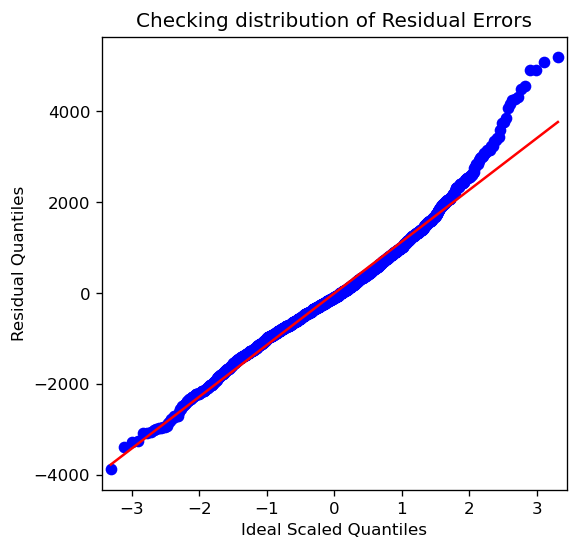

In [14]:
# importing the QQ-plot from the from the statsmodels
import numpy as np
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(error_df.error, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

> The QQ-plot clearly verifies our findings from the the histogram of the residuals, the data is mostly normal in nature, but there sre some outliers on the higher end of the Residues.


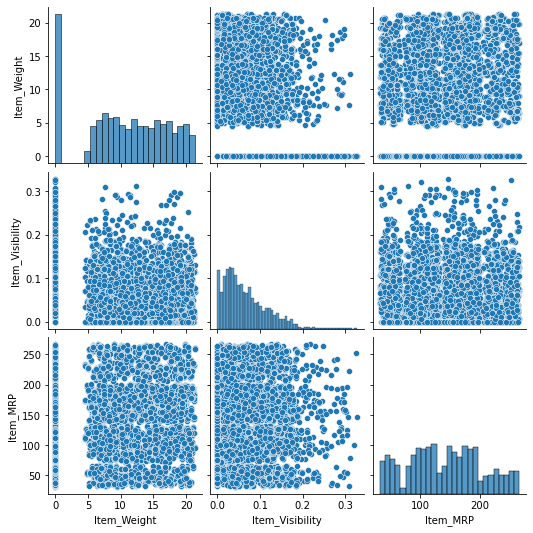

In [15]:
import seaborn as sns

sns.pairplot(df[['Item_Weight', 'Item_Visibility', 'Item_MRP']])

Since there are lot of features and feature selection is not in the scope of this notebook, displayed pairplot only between some columns.

### Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [25]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [32]:
trainx_with_constant = add_constant(train_x.values)
trainx_with_constant[1]
# we can observe, one has beed added as the first value

array([1.0000000e+00, 1.6000000e+01, 7.2655379e-02, 2.2986680e+02,
       2.0040000e+03, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00])

In [34]:
# Calculating VIF for every column (only works for the not Catagorical)
VIF= pd.Series([variance_inflation_factor(trainx_with_constant, i) for i in range(1,trainx_with_constant.shape[1])], 
                index =train_x.columns)
VIF

C:\Users\rkt7k\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Item_Weight                        2.335412
Item_Visibility                    1.099468
Item_MRP                           1.015434
Outlet_Establishment_Year               inf
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood                       inf
Item_Type_Snack Foods           

# Model Inpretability
So far we have simply been predicting the values using the linear regression, But in order to Interpret the model, the normalising of the data is essential.

In [40]:
lr = LR(normalize=True)
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [41]:
train_pred = lr.predict(train_x)
train_mae = mae(train_pred, train_y)
print('Training Mean Absolute Error :', train_mae)

Training Mean Absolute Error : 850.426924968711


In [42]:
test_pred = lr.predict(test_x)
test_mae = mae(test_pred, test_y)
print('Training Mean Absolute Error :', test_mae)

Training Mean Absolute Error : 880.1328247770999


In [43]:
feature_importance_df = pd.DataFrame({
    'Feature' : train_x.columns,
    'Importance': lr.coef_
})

feature_importance_df['Importance_magnitude'] = feature_importance_df.Importance.abs()

feature_importance_df.sort_values(by='Importance_magnitude', inplace=True, ascending=False)
# sorting so we can plot only top n important features for better visibility

feature_importance_df.head()

,Feature,Importance,Importance_magnitude
29,Outlet_Identifier_OUT019,-9.311582e+15,9.311582e+15
26,Outlet_Identifier_OUT013,-7.190359e+15,7.190359e+15
35,Outlet_Size_High,-6.300353e+15,6.300353e+15
44,Outlet_Type_Supermarket Type3,-6.171283e+15,6.171283e+15
43,Outlet_Type_Supermarket Type2,6.060654e+15,6.060654e+15


Text(0.5, 1.0, 'Coefficient plot')

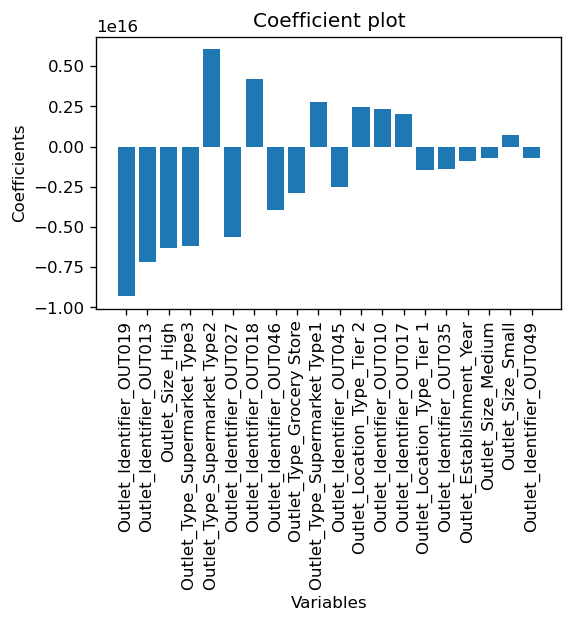

In [44]:
# plotting the coefficients


plt.figure(figsize=(5,3), dpi=120, facecolor='w', edgecolor='b')
x = feature_importance_df['Feature'].head(20)
y = feature_importance_df['Importance'].head(20)
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.xticks(rotation=90)
plt.title('Coefficient plot')

Now the coefficients we see are normalised and we can easily make final inferences out of it.